# ******NOTE: Some of the algorithms are expected to run longer. Please be patient during executing******

# Data Description:

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

# Domain:
Cement manufacturing

# Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

# Attribute Information:

1. Cement : measured in kg in a m3 mixture
2. Blast : measured in kg in a m3 mixture
3. Fly ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplasticizer : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)
9. Concrete compressive strength measured in MPa

# Learning Outcomes:
1. Exploratory Data Analysis
2. Building ML models for regression
3. Hyper parameter tuning

# Objective:
Modeling of strength of high performance concrete using Machine Learning

# Steps and tasks:
1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)
    
a. Univariate analysis (5 marks) 
   - Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers
    
b. Multivariate analysis (5 marks)
   - Bi-variate analysis between the predictor variables and between the predictor variables and target column. 
   - Comment on your findings in terms of their relationship and degree of relation if any. 
   - Presence of leverage points. 
   - Visualize the analysis using boxplots and pair plots, histograms or density curves. 
   - Select the most appropriate attributes

c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)
    
2. Deliverable -2 (Feature Engineering techniques) (15 marks)
   - Identify opportunities (if any) to create a composite feature, drop a feature
   - Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
   - Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength
     
3. Deliverable -3 (create the model ) ( 15 marks)
  - Obtain feature importance for the individual features and present your findings
    
4. Deliverable -4 (Tuning the model) (20 marks)
   - Algorithms that you think will be suitable for this project
   - Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
   - Model performance range at 95% confidence level

# References:
- Medium article on hyper parameter tuning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error


In [2]:
#read the dataset
concrete_df = pd.read_csv("concrete.csv")

In [3]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete_df.shape

(1030, 9)

In [5]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_df.isnull().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [8]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


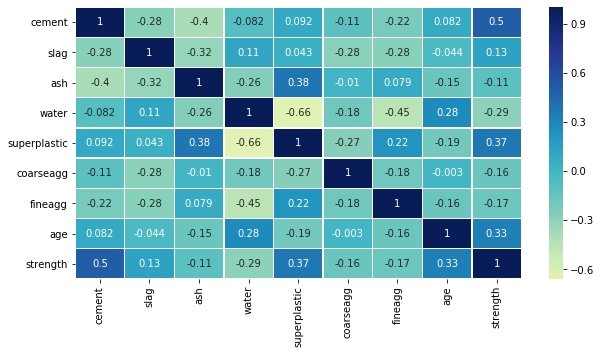

In [9]:
#lets view them visually
plt.figure(figsize=(10,5))
sns.heatmap(concrete_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu")
plt.show()

<Figure size 1080x1080 with 0 Axes>

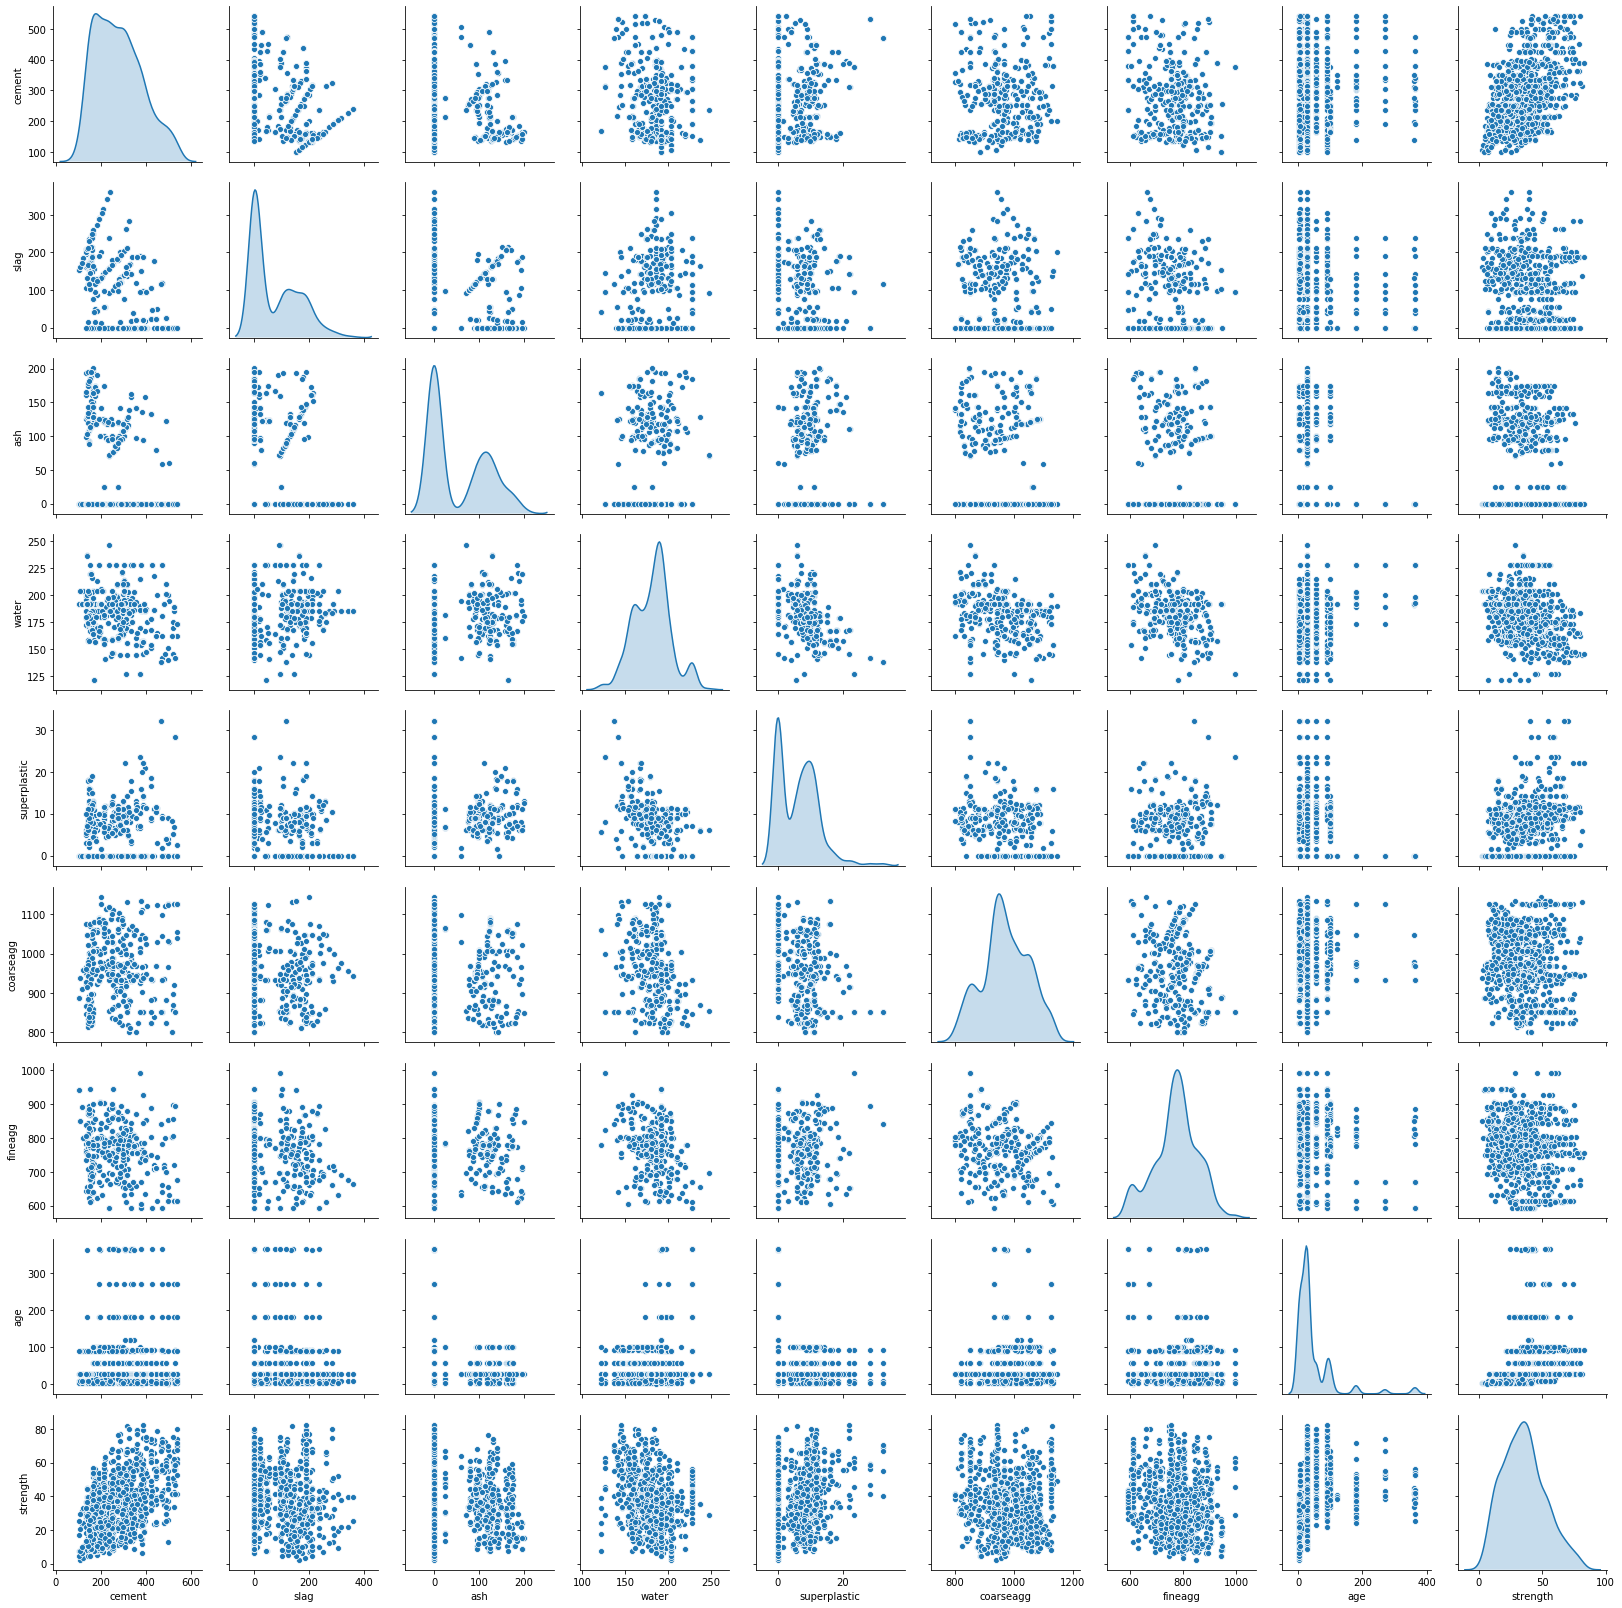

In [10]:
#pair plot 
plt.figure(figsize = (15,15))
sns.pairplot(concrete_df, diag_kind='kde')
plt.show()

We can see here that there are no visual evidences of normal distribution of the variables, except for Strength and cement
Also through visual observation, atleast we can say that 5 clusters can be grouped from the data. 
We can see a good correlation between cement and strength. But other variables are not correlated and distributed across the area

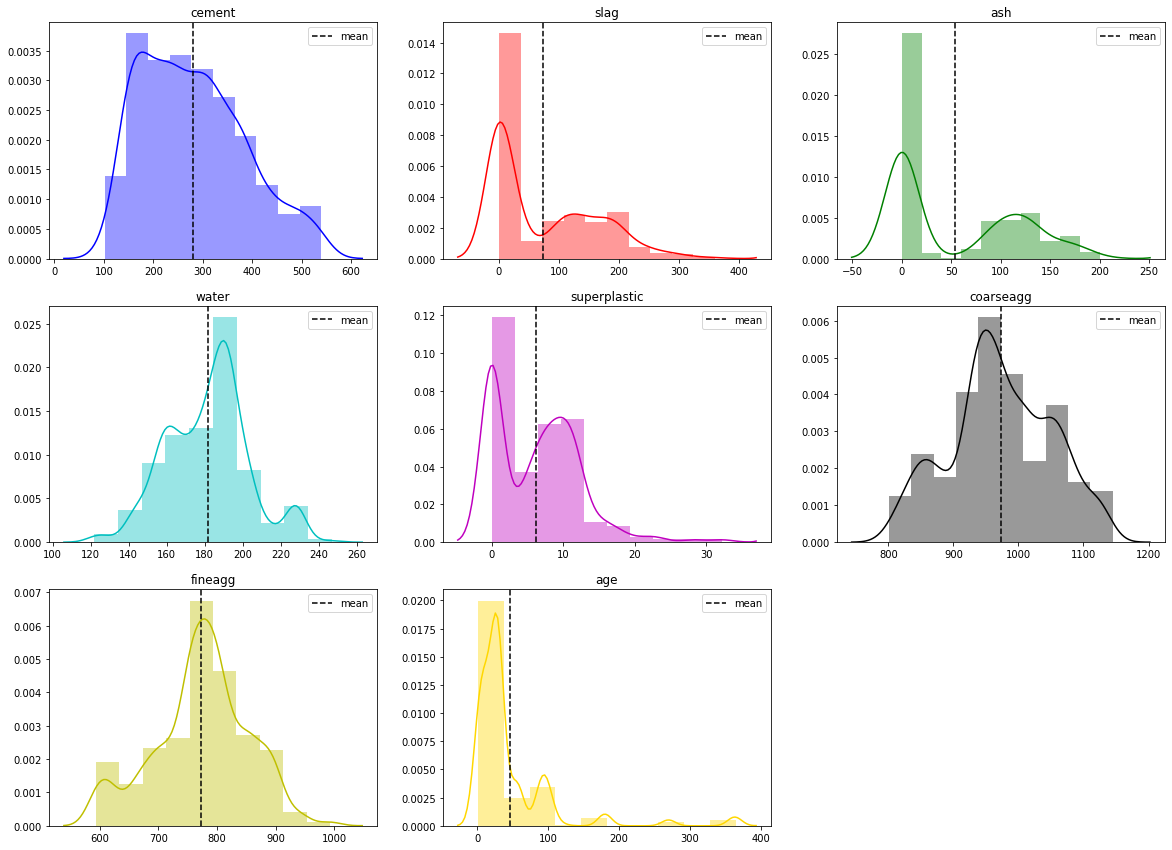

In [11]:
#perform distribution plot to see the distribution of the attributes
import itertools
columns = [c for c in concrete_df.columns if c not in 'strength']
colours = ["b","r","g","c","m","k","y","gold"]
length = len(columns)
fig = plt.figure(figsize=(20,20))

for i,j,k in itertools.zip_longest(columns,range(length),colours):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(concrete_df[i],bins = 10, color = k)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="black")
    plt.xlabel("")
    

Except for cement, rest all variables are not normally distributed. With the observation we can see that 5 clusters are formed.

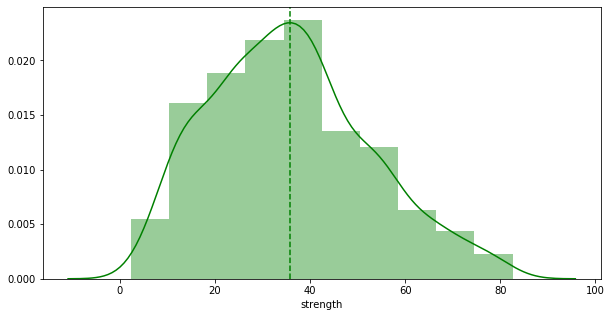

In [12]:
fig = plt.figure(figsize=(10,5))
ax = sns.distplot(concrete_df['strength'],bins = 10, color = "g")
ax.set_facecolor("w")
plt.axvline(concrete_df['strength'].mean(),linestyle="dashed",label="mean",color="g")
plt.xlabel("strength")
plt.show()

strength variable which is our target variable is normally distributed

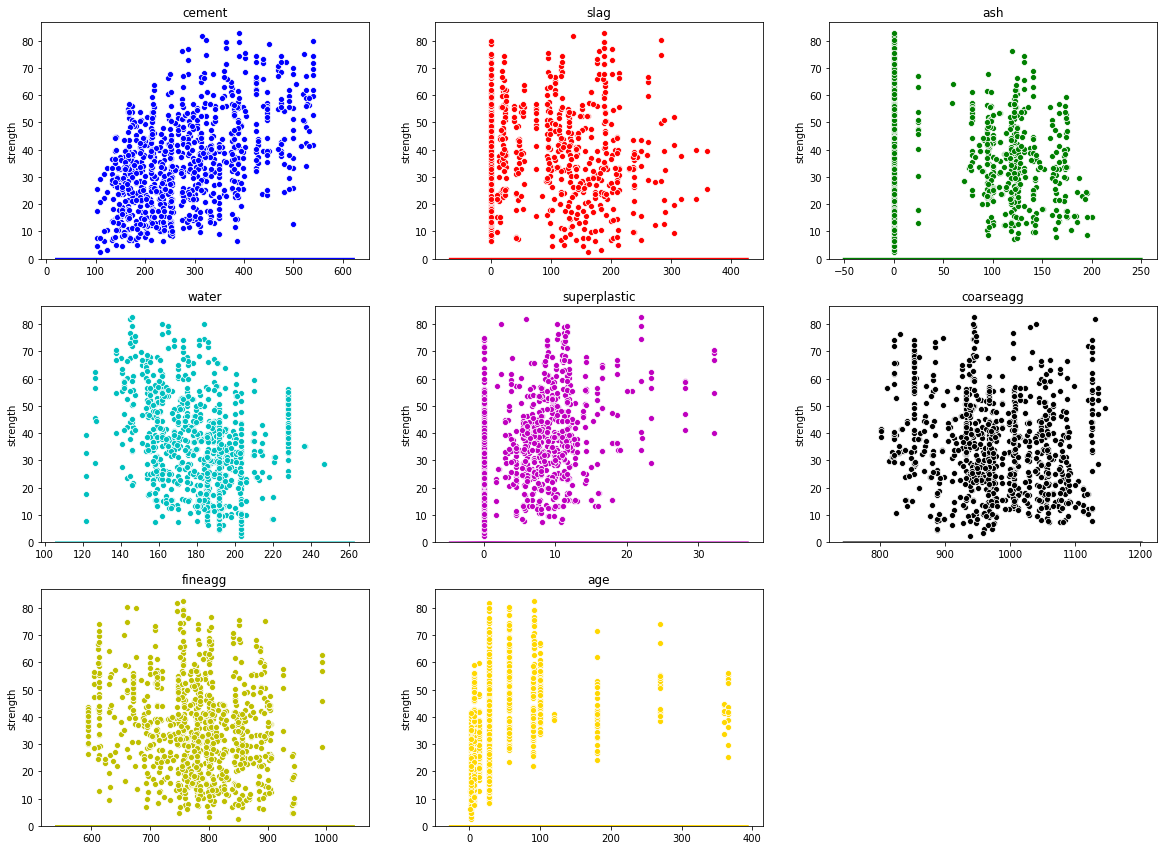

In [13]:
#visually checking the scatter plot between our attributes and target variable
columns = [c for c in concrete_df.columns if c not in 'strength']
colours = ["b","r","g","c","m","k","y","gold"]
length = len(columns)
fig = plt.figure(figsize=(20,20))

for i,j,k in itertools.zip_longest(columns,range(length),colours):
    plt.subplot(4,3,j+1)
    ax = sns.distplot(concrete_df[i],bins = 10, color = k)
    ax = sns.scatterplot(x = i, y = 'strength', data = concrete_df,color = k)
    ax.set_facecolor("w")
    plt.title(i,color="black")
    plt.xlabel("")

from the above visuals, only cement is directly correlated to the target variable. rest all of the are distributed accross and no correlation is found out

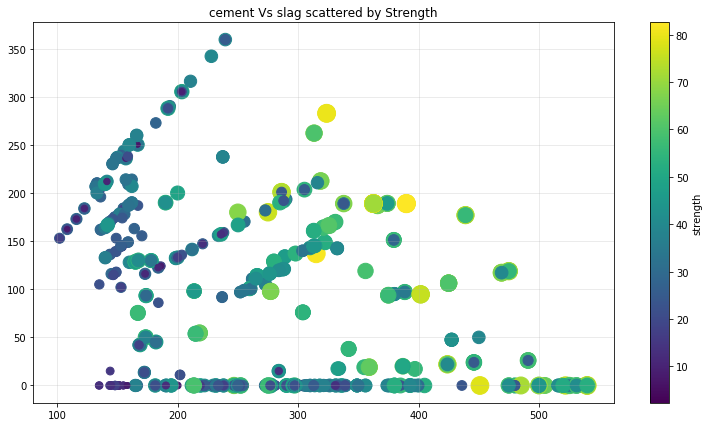

In [14]:
#scatter plot between cement and slag grouped by the strength 
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["cement"],concrete_df["slag"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("cement")
ax.set_ylabel("slag")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("cement Vs slag scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

There are several data points which are having least strength when the cement is between 100 - 200 and slag is between 0 -200. Higher strength is visible when the cement is above 400 and slag is above 200

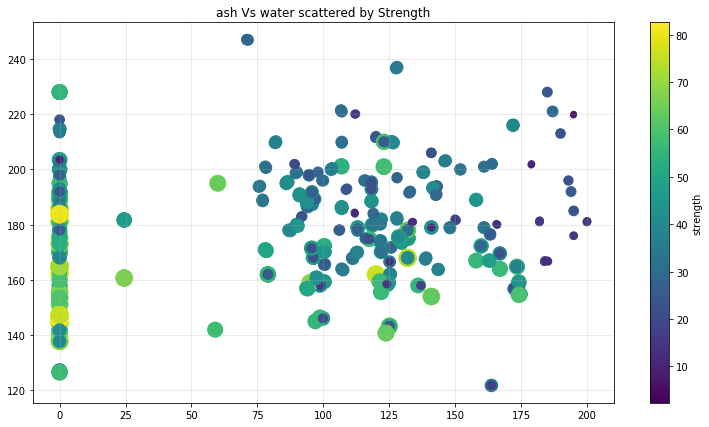

In [15]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["ash"],concrete_df["water"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("ash")
ax.set_ylabel("water")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("ash Vs water scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

There are high clustering of lower strength when ash is greater than 75 and water is above 140. when ash is 0, we can see higher strength

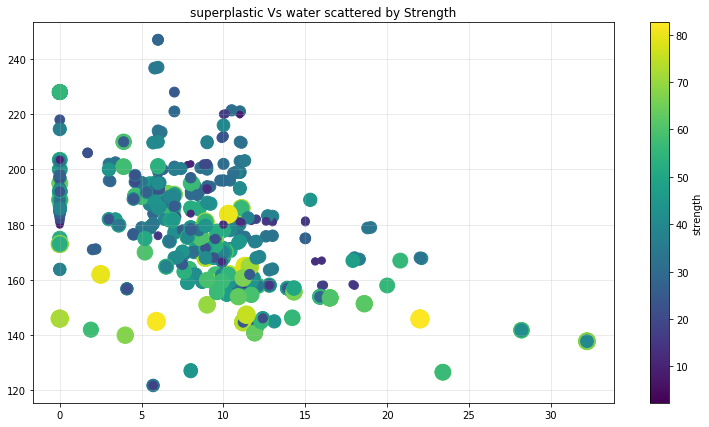

In [16]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["superplastic"],concrete_df["water"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("superplastic")
ax.set_ylabel("water")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("superplastic Vs water scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

higher strength is visible when water is below 160

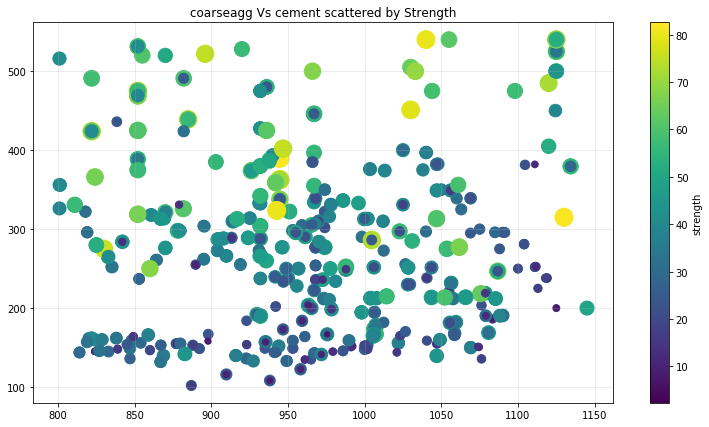

In [17]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["coarseagg"],concrete_df["cement"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("coarseagg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("coarseagg Vs cement scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

Higher strength is visible when coarseagg is above 300

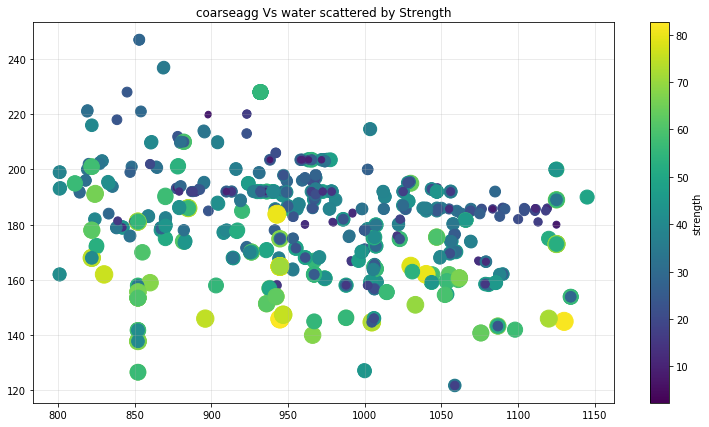

In [18]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["coarseagg"],concrete_df["water"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("coarseagg")
ax.set_ylabel("water")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("coarseagg Vs water scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

Higher strength is visible when water is below 180

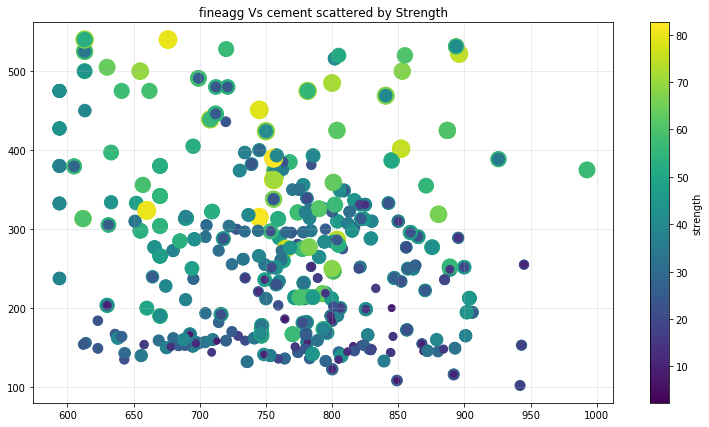

In [19]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["fineagg"],concrete_df["cement"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("fineagg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("fineagg Vs cement scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

Strength is higher when cement is above 300 

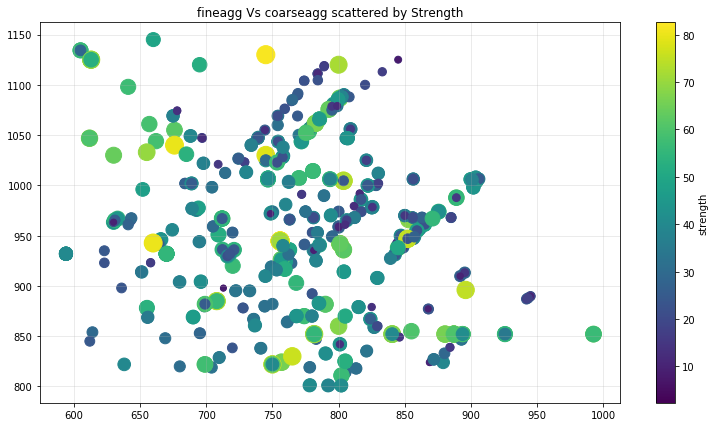

In [20]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["fineagg"],concrete_df["coarseagg"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("fineagg")
ax.set_ylabel("coarseagg")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("fineagg Vs coarseagg scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

Observations from this is difficult as we see that higher strength and lower strength are prevalent across the area

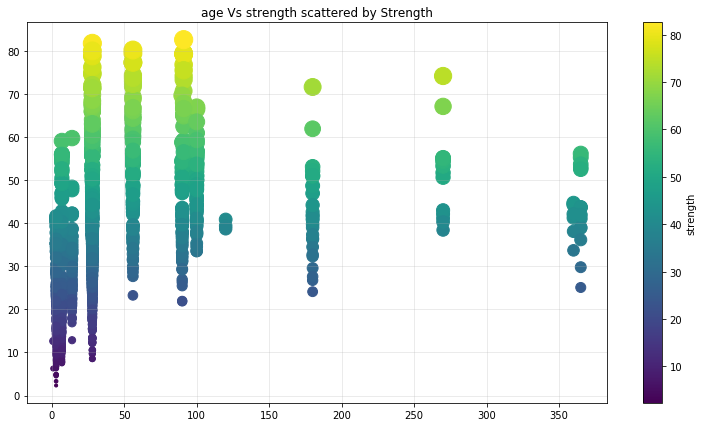

In [21]:
fig = plt.figure(figsize=(13,7))
plt.scatter(concrete_df["age"],concrete_df["strength"],
            c=concrete_df["strength"],s=concrete_df["strength"]*4)
ax.set_xlabel("age")
ax.set_ylabel("strength")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("age Vs strength scattered by Strength")
plt.grid(True,alpha=.3)
plt.show()

at different values of age we can see that higher strength is visible when age is between 10 to 100

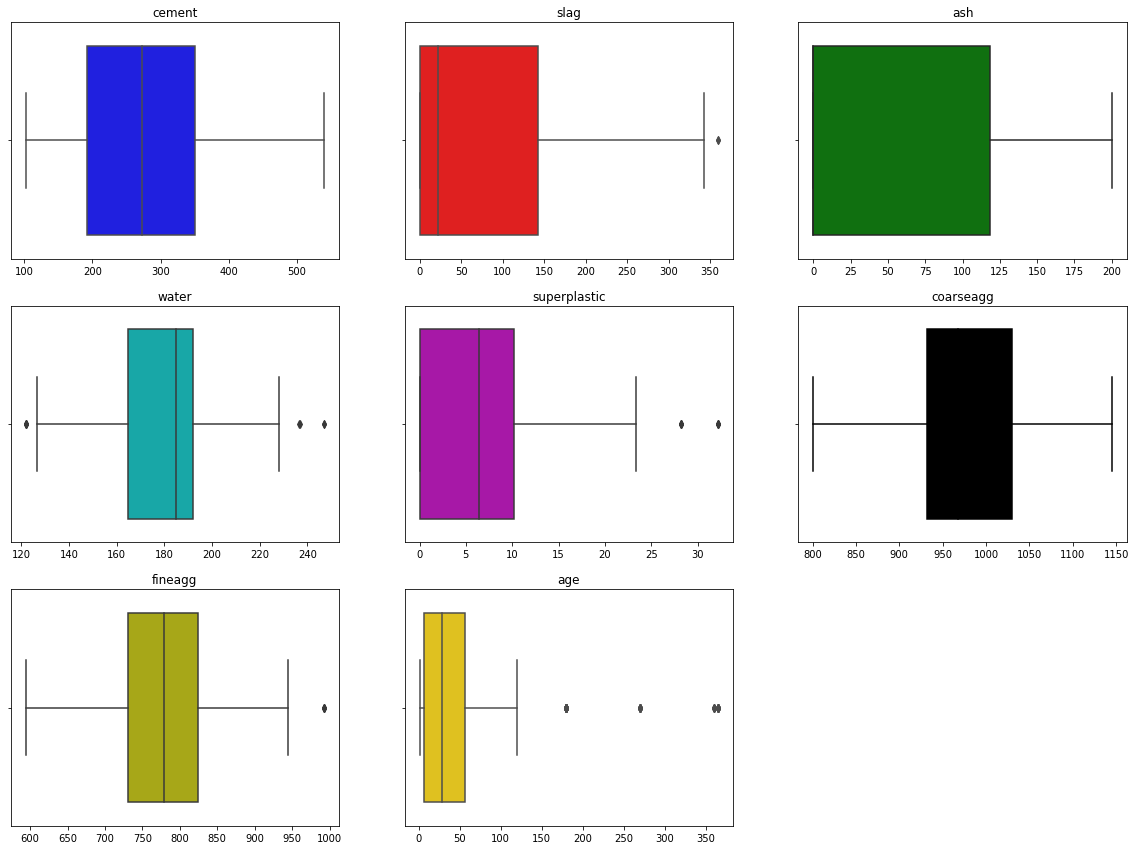

In [22]:
#lets do box plot among the attributes
columns = [c for c in concrete_df.columns if c not in 'strength']
colours = ["b","r","g","c","m","k","y","gold"]
length = len(columns)
fig = plt.figure(figsize=(20,20))

for i,j,k in itertools.zip_longest(columns,range(length),colours):
    plt.subplot(4,3,j+1)
    ax = sns.boxplot(data = concrete_df,x=concrete_df[i], color = k)
    ax.set_facecolor("w")
    plt.title(i,color="black")
    plt.xlabel("")
    

Outliers are visible for slag, water, superplastic, fineagg, age

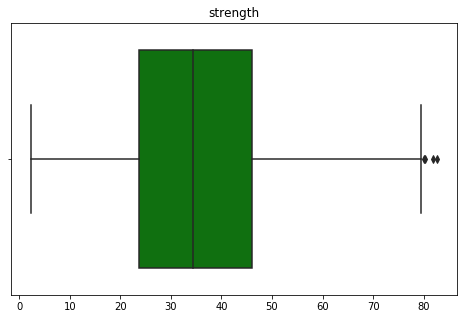

In [23]:
fig = plt.figure(figsize=(8,5))
ax = sns.boxplot(data = concrete_df,x=concrete_df['strength'], color = 'g')
ax.set_facecolor("w")
plt.title('strength',color="black")
plt.xlabel("")
plt.show()

some outliers are visible for strength as well

- There are lot of outliers in several columns
- Lets treat them. But before that, we shall divide the entire data into train / validation and test and treat only the train data, to prevent the data leak

# Splitting the data into Train / Validation & Test

In [24]:
X = concrete_df.drop(columns = 'strength',axis = 1)
y = concrete_df[['strength']]

from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)
print(X_data.shape, X_test.shape, y_data.shape, y_test.shape)
X_train,X_val,y_train,y_val= train_test_split(X_data, y_data,  test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_val.shape,y_val.shape)

(824, 8) (206, 8) (824, 1) (206, 1)
(659, 8) (206, 8) (659, 1) (206, 1) (165, 8) (165, 1)


In [25]:
#finding the number of outliers in each of the X_train columns
for i in X_train.columns:
    q1 = np.quantile(X_train[i], 0.25)
    q2 = np.quantile(X_train[i], 0.50)
    q3 = np.quantile(X_train[i], 0.75)
    IQR = q3 - q1
    q4 = X_train[i].quantile(0.75) + (1.5*IQR)
    q5 = X_train[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_train[X_train[i] > q4][i].shape[0]) 
    above = X_train[X_train[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_train[X_train[i] < q5][i].shape[0]) 
    below = X_train[X_train[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_train[i].values.tolist())
        X_train[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_train[i].values.tolist())
        X_train[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()        

cement above  601.7 are outliers
No. of outliers  0
cement below -49.50000000000003 are outliers
No. of outliers  0
slag above  356.25 are outliers
No. of outliers  1
slag below -213.75 are outliers
No. of outliers  0
ash above  295.75 are outliers
No. of outliers  0
ash below -177.45 are outliers
No. of outliers  0
water above  235.04999999999998 are outliers
No. of outliers  3
water below 120.25000000000003 are outliers
No. of outliers  0
superplastic above  26.0 are outliers
No. of outliers  8
superplastic below -15.600000000000001 are outliers
No. of outliers  0
coarseagg above  1210.9999999999998 are outliers
No. of outliers  0
coarseagg below 764.6000000000001 are outliers
No. of outliers  0
fineagg above  961.6750000000001 are outliers
No. of outliers  2
fineagg below 597.8749999999999 are outliers
No. of outliers  16
age above  129.5 are outliers
No. of outliers  39
age below -66.5 are outliers
No. of outliers  0


In [26]:
#fixing the outliers in each column of X_train
for i in X_train.columns:
    q1 = np.quantile(X_train[i], 0.25)
    q2 = np.quantile(X_train[i], 0.50)
    q3 = np.quantile(X_train[i], 0.75)
    IQR = q3 - q1
    q4 = X_train[i].quantile(0.75) + (1.5*IQR)
    q5 = X_train[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_train[X_train[i] > q4][i].shape[0]) 
    above = X_train[X_train[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_train[X_train[i] < q5][i].shape[0]) 
    below = X_train[X_train[i] < q5][i].shape[0]

cement above  601.7 are outliers
No. of outliers  0
cement below -49.50000000000003 are outliers
No. of outliers  0
slag above  356.25 are outliers
No. of outliers  0
slag below -213.75 are outliers
No. of outliers  0
ash above  295.75 are outliers
No. of outliers  0
ash below -177.45 are outliers
No. of outliers  0
water above  235.04999999999998 are outliers
No. of outliers  0
water below 120.25000000000003 are outliers
No. of outliers  0
superplastic above  26.0 are outliers
No. of outliers  0
superplastic below -15.600000000000001 are outliers
No. of outliers  0
coarseagg above  1210.9999999999998 are outliers
No. of outliers  0
coarseagg below 764.6000000000001 are outliers
No. of outliers  0
fineagg above  961.6750000000001 are outliers
No. of outliers  0
fineagg below 597.8749999999999 are outliers
No. of outliers  0
age above  129.5 are outliers
No. of outliers  0
age below -66.5 are outliers
No. of outliers  0


In [27]:
#finding the number of outliers in each of the X_val columns
for i in X_val.columns:
    q1 = np.quantile(X_val[i], 0.25)
    q2 = np.quantile(X_val[i], 0.50)
    q3 = np.quantile(X_val[i], 0.75)
    IQR = q3 - q1
    q4 = X_val[i].quantile(0.75) + (1.5*IQR)
    q5 = X_val[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_val[X_val[i] > q4][i].shape[0]) 
    above = X_val[X_val[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_val[X_val[i] < q5][i].shape[0]) 
    below = X_val[X_val[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_val[i].values.tolist())
        X_val[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_val[i].values.tolist())
        X_val[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()
        

cement above  612.05 are outliers
No. of outliers  0
cement below -62.74999999999997 are outliers
No. of outliers  0
slag above  353.25 are outliers
No. of outliers  0
slag below -211.95000000000002 are outliers
No. of outliers  0
ash above  282.5 are outliers
No. of outliers  0
ash below -169.5 are outliers
No. of outliers  0
water above  232.64999999999998 are outliers
No. of outliers  0
water below 124.25000000000001 are outliers
No. of outliers  0
superplastic above  25.0 are outliers
No. of outliers  0
superplastic below -15.0 are outliers
No. of outliers  0
coarseagg above  1150.0 are outliers
No. of outliers  0
coarseagg below 810.8000000000001 are outliers
No. of outliers  1
fineagg above  958.25 are outliers
No. of outliers  1
fineagg below 616.25 are outliers
No. of outliers  10
age above  119.0 are outliers
No. of outliers  9
age below -49.0 are outliers
No. of outliers  0


In [28]:
#fixing the outliers in each column of X_val
for i in X_val.columns:
    q1 = np.quantile(X_val[i], 0.25)
    q2 = np.quantile(X_val[i], 0.50)
    q3 = np.quantile(X_val[i], 0.75)
    IQR = q3 - q1
    q4 = X_val[i].quantile(0.75) + (1.5*IQR)
    q5 = X_val[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_val[X_val[i] > q4][i].shape[0]) 
    above = X_val[X_val[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_val[X_val[i] < q5][i].shape[0]) 
    below = X_val[X_val[i] < q5][i].shape[0]

cement above  612.05 are outliers
No. of outliers  0
cement below -62.74999999999997 are outliers
No. of outliers  0
slag above  353.25 are outliers
No. of outliers  0
slag below -211.95000000000002 are outliers
No. of outliers  0
ash above  282.5 are outliers
No. of outliers  0
ash below -169.5 are outliers
No. of outliers  0
water above  232.64999999999998 are outliers
No. of outliers  0
water below 124.25000000000001 are outliers
No. of outliers  0
superplastic above  25.0 are outliers
No. of outliers  0
superplastic below -15.0 are outliers
No. of outliers  0
coarseagg above  1150.0 are outliers
No. of outliers  0
coarseagg below 810.8000000000001 are outliers
No. of outliers  0
fineagg above  958.25 are outliers
No. of outliers  0
fineagg below 616.25 are outliers
No. of outliers  0
age above  119.0 are outliers
No. of outliers  0
age below -49.0 are outliers
No. of outliers  0


In [29]:
#finding the number of outliers in each of the X_test columns
for i in X_test.columns:
    q1 = np.quantile(X_test[i], 0.25)
    q2 = np.quantile(X_test[i], 0.50)
    q3 = np.quantile(X_test[i], 0.75)
    IQR = q3 - q1
    q4 = X_test[i].quantile(0.75) + (1.5*IQR)
    q5 = X_test[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_test[X_test[i] > q4][i].shape[0]) 
    above = X_test[X_test[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_test[X_test[i] < q5][i].shape[0]) 
    below = X_test[X_test[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_test[i].values.tolist())
        X_test[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_test[i].values.tolist())
        X_test[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()
        

cement above  560.2750000000001 are outliers
No. of outliers  0
cement below -30.52500000000009 are outliers
No. of outliers  0
slag above  378.0 are outliers
No. of outliers  0
slag below -226.79999999999998 are outliers
No. of outliers  0
ash above  295.6875 are outliers
No. of outliers  0
ash below -177.4125 are outliers
No. of outliers  0
water above  227.37500000000006 are outliers
No. of outliers  17
water below 141.97499999999997 are outliers
No. of outliers  6
superplastic above  23.75 are outliers
No. of outliers  2
superplastic below -14.25 are outliers
No. of outliers  0
coarseagg above  1155.025 are outliers
No. of outliers  0
coarseagg below 795.2249999999998 are outliers
No. of outliers  0
fineagg above  943.2749999999999 are outliers
No. of outliers  2
fineagg below 573.8750000000002 are outliers
No. of outliers  0
age above  119.0 are outliers
No. of outliers  11
age below -49.0 are outliers
No. of outliers  0


In [30]:
#fixing the outliers in each column of X_test
for i in X_test.columns:
    q1 = np.quantile(X_test[i], 0.25)
    q2 = np.quantile(X_test[i], 0.50)
    q3 = np.quantile(X_test[i], 0.75)
    IQR = q3 - q1
    q4 = X_test[i].quantile(0.75) + (1.5*IQR)
    q5 = X_test[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_test[X_test[i] > q4][i].shape[0]) 
    above = X_test[X_test[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_test[X_test[i] < q5][i].shape[0]) 
    below = X_test[X_test[i] < q5][i].shape[0]

cement above  560.2750000000001 are outliers
No. of outliers  0
cement below -30.52500000000009 are outliers
No. of outliers  0
slag above  378.0 are outliers
No. of outliers  0
slag below -226.79999999999998 are outliers
No. of outliers  0
ash above  295.6875 are outliers
No. of outliers  0
ash below -177.4125 are outliers
No. of outliers  0
water above  227.37500000000006 are outliers
No. of outliers  0
water below 141.97499999999997 are outliers
No. of outliers  0
superplastic above  23.75 are outliers
No. of outliers  0
superplastic below -14.25 are outliers
No. of outliers  0
coarseagg above  1155.025 are outliers
No. of outliers  0
coarseagg below 795.2249999999998 are outliers
No. of outliers  0
fineagg above  943.2749999999999 are outliers
No. of outliers  0
fineagg below 573.8750000000002 are outliers
No. of outliers  0
age above  119.0 are outliers
No. of outliers  0
age below -49.0 are outliers
No. of outliers  0


# Simple Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
Linear_regression_model = LinearRegression()
Linear_regression_model.fit(X_train, y_train)

#Lets check the coeff of each columns
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Linear_regression_model.coef_[0][idx]))
    
#Let us check the intercept for the model
intercept = Linear_regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

print("Train scores",Linear_regression_model.score(X_train, y_train))
print("Validation scores",Linear_regression_model.score(X_val, y_val))
print("Test scores",Linear_regression_model.score(X_test, y_test))
prediction = Linear_regression_model.predict(X_test)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test,prediction)) )

Train_scores = Linear_regression_model.score(X_train, y_train)
Validation_scores = Linear_regression_model.score(X_val, y_val)
Test_scores = Linear_regression_model.score(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

#Store the score results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Simple Linear Regression'], 'Train Score': Train_scores*100.0, 
                          'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE': RMSE })
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

The coefficient for cement is 0.1049086692673564
The coefficient for slag is 0.08641320837271944
The coefficient for ash is 0.0641442699940485
The coefficient for water is -0.19384392397084937
The coefficient for superplastic is 0.2534295781314446
The coefficient for coarseagg is 0.003067352289873831
The coefficient for fineagg is -0.0011288191467469576
The coefficient for age is 0.25448559072268967
The intercept for our model is [18.16711966]
Train scores 0.7121739863367804
Validation scores 0.7645200032142772
Test scores 0.7707723145020451
ROOT MEAN SQUARED ERROR : 7.69050412652213


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452,77.077231,7.690504


# Scaling the data

In [33]:

from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) 
y_train_scaled = preprocessing.scale(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns) 

In [34]:
Linear_regression_model_s = LinearRegression()
Linear_regression_model_s.fit(X_train_scaled, y_train_scaled)

#Lets check the coeff of each columns
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, Linear_regression_model_s.coef_[0][idx]))
    
#Let us check the intercept for the model
intercept = Linear_regression_model_s.intercept_
print("The intercept for our model is {}".format(intercept))

print("Train scores",Linear_regression_model_s.score(X_train_scaled, y_train_scaled))


X_val_scaled = preprocessing.scale(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns) 
y_val_scaled = preprocessing.scale(y_val)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=y_val.columns) 
print("Validation scores",Linear_regression_model_s.score(X_val_scaled, y_val_scaled))


X_test_scaled = preprocessing.scale(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns) 
y_test_scaled = preprocessing.scale(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=y_test.columns) 
print("Test scores",Linear_regression_model_s.score(X_test_scaled, y_test_scaled))

prediction = Linear_regression_model_s.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = Linear_regression_model_s.score(X_train_scaled, y_train_scaled)
Validation_scores = Linear_regression_model_s.score(X_val_scaled, y_val_scaled)
Test_scores = Linear_regression_model_s.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))

#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Simple Linear Regression Scaled'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

The coefficient for cement is 0.656489342696729
The coefficient for slag is 0.4389803259496613
The coefficient for ash is 0.24468214326992474
The coefficient for water is -0.24942942336644952
The coefficient for superplastic is 0.0892708904926506
The coefficient for coarseagg is 0.014580345965647775
The coefficient for fineagg is -0.005259796552596063
The coefficient for age is 0.5474198030286646
The intercept for our model is [1.86577156e-16]
Train scores 0.7121739863367804
Validation scores 0.7701039099085424
Test scores 0.7703078495876134
ROOT MEAN SQUARED ERROR : 0.47926208947963594


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262


# Ridge Model

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train_scaled,y_train_scaled)
print ("Ridge model:", (ridge.coef_))

#Lets check the coeff of each columns
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))
    
#Let us check the intercept for the model
intercept = ridge.intercept_
print("The intercept for our model is {}".format(intercept))

print("Train scores",ridge.score(X_train_scaled, y_train_scaled))
print("Validation scores",ridge.score(X_val_scaled, y_val_scaled))
print("Test scores",ridge.score(X_test_scaled, y_test_scaled))

prediction = ridge.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = ridge.score(X_train_scaled, y_train_scaled)
Validation_scores = ridge.score(X_val_scaled, y_val_scaled)
Test_scores = ridge.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))

#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Ridge model: [[ 0.65285314  0.43546635  0.24155952 -0.25156361  0.0895031   0.01219997
  -0.00819955  0.54707423]]
The coefficient for cement is 0.6528531398458611
The coefficient for slag is 0.4354663536907976
The coefficient for ash is 0.2415595221251844
The coefficient for water is -0.2515636139953287
The coefficient for superplastic is 0.08950309940358994
The coefficient for coarseagg is 0.01219996642404541
The coefficient for fineagg is -0.008199550080295347
The coefficient for age is 0.5470742330555544
The intercept for our model is [1.83882492e-16]
Train scores 0.7121720312189335
Validation scores 0.7700727368630476
Test scores 0.7701694768057418
ROOT MEAN SQUARED ERROR : 0.4794064279859608


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406


# Lasso Model

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train_scaled,y_train_scaled)
print ("Lasso model:", (lasso.coef_))

#Lets check the coeff of each columns
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))
    
#Let us check the intercept for the model
intercept = lasso.intercept_
print("The intercept for our model is {}".format(intercept))

print("Train scores",lasso.score(X_train_scaled, y_train_scaled))
print("Validation scores",lasso.score(X_val_scaled, y_val_scaled))
print("Test scores",lasso.score(X_test_scaled, y_test_scaled))

prediction = lasso.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = lasso.score(X_train_scaled, y_train_scaled)
Validation_scores = lasso.score(X_val_scaled, y_val_scaled)
Test_scores = lasso.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))

#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Lasso model: [ 0.38836132  0.16168678  0.         -0.11903002  0.1859875  -0.
 -0.          0.41058682]
The coefficient for cement is 0.38836132041159876
The coefficient for slag is 0.1616867824145476
The coefficient for ash is 0.0
The coefficient for water is -0.11903002111266256
The coefficient for superplastic is 0.18598749549276564
The coefficient for coarseagg is -0.0
The coefficient for fineagg is -0.0
The coefficient for age is 0.4105868166751168
The intercept for our model is [5.94723475e-17]
Train scores 0.6322936473569909
Validation scores 0.6762313584308237
Test scores 0.6677466253783809
ROOT MEAN SQUARED ERROR : 0.5764142387394842


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414


# Create Polynomial Models

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

In [39]:
X_poly = poly.fit_transform(X_scaled)
X_data, X_test, y_data, y_test = train_test_split(X_poly,y_scaled, test_size = 0.2, random_state = 7)
print(X_data.shape, X_test.shape, y_data.shape, y_test.shape)
X_train,X_val,y_train,y_val= train_test_split(X_data, y_data,  test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_val.shape,y_val.shape)

(824, 93) (206, 93) (824, 1) (206, 1)
(659, 93) (206, 93) (659, 1) (206, 1) (165, 93) (165, 1)


In [40]:
Linear_regression_model = LinearRegression()
Linear_regression_model.fit(X_train, y_train)


print("Train scores",Linear_regression_model.score(X_train, y_train))
print("Validation scores",Linear_regression_model.score(X_val, y_val))
print("Test scores",Linear_regression_model.score(X_test, y_test))
prediction = Linear_regression_model.predict(X_test)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test,prediction)) )

Train_scores = Linear_regression_model.score(X_train, y_train)
Validation_scores = Linear_regression_model.score(X_val, y_val)
Test_scores = Linear_regression_model.score(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

#Store the score results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Linear Regression for poly features'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Train scores 0.8072763492119447
Validation scores 0.7730159358228446
Test scores 0.741016612563294
ROOT MEAN SQUARED ERROR : 0.489556007551602


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556


# Fit Ridge on Polynomial features


In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

print("Train scores",ridge.score(X_train, y_train))
print("Validation scores",ridge.score(X_val, y_val))
print("Test scores",ridge.score(X_test, y_test))

prediction = ridge.predict(X_test)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test,prediction)) )

Train_scores = ridge.score(X_train, y_train)
Validation_scores = ridge.score(X_val, y_val)
Test_scores = ridge.score(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ridge fit on Poly feature'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Ridge model: [[ 0.00000000e+00  9.47345728e-01  7.15675117e-01  6.06703450e-01
  -1.62230251e-01  5.91713850e-02  5.55132112e-02  1.15121326e-01
   1.18931981e+00  4.73940745e-02  1.56307871e-01 -7.33310338e-02
  -9.77043222e-02 -4.32007033e-03  1.58573196e-01  2.79690645e-01
   2.03016358e-01 -1.14610319e-01 -2.60430840e-01 -1.63635384e-01
   1.50084276e-01  3.57324722e-01 -5.69102691e-02 -3.34951213e-01
  -9.18929571e-02  1.68536777e-01  5.59403342e-01 -1.30405954e-01
  -1.53566097e-01 -5.01464429e-02 -2.76450220e-01 -1.45958597e-02
  -9.26667166e-02  1.91657349e-02  5.70039271e-02 -1.40491088e-01
  -5.30167270e-02  5.72051833e-02  9.78042150e-02 -1.73842867e-02
  -2.00294672e-02  5.81473924e-02 -4.41943302e-02  5.04860723e-02
  -4.78699221e-02 -1.90922597e-03  4.54531518e-02  2.33839695e-01
   1.71039523e-01  8.98079366e-02  6.83330753e-02 -1.37476288e-01
   9.24445921e-03  7.63498042e-02  5.78595741e-02  2.58670698e-02
  -2.33256633e-02  1.02631231e-02  3.31084132e-02 -1.43374119e-

,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216


# Lasso Fit on Polynomial Feature

In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


print("Train scores",lasso.score(X_train, y_train))
print("Validation scores",lasso.score(X_val, y_val))
print("Test scores",lasso.score(X_test, y_test))

prediction = lasso.predict(X_test)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test,prediction)) )

Train_scores = lasso.score(X_train, y_train)
Validation_scores = lasso.score(X_val, y_val)
Test_scores = lasso.score(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(y_test,prediction))

#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Lasso fit on poly features'], 'Train Score': Train_scores*100.0, 
                              'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Lasso model: [ 0.          0.38560796  0.15556136  0.         -0.11206754  0.19280362
 -0.         -0.          0.272063    0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
  0.00411029 -0.          0.         -0.          0.         -0.
  0.         -0.00493775 -0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          0.          0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
 -0.

,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160


Since Linear Regression models are not effective, lets try some other models for regression

# Decision Tree Regressor

In [43]:
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)
print(X_data.shape, X_test.shape, y_data.shape, y_test.shape)
X_train,X_val,y_train,y_val= train_test_split(X_data, y_data,  test_size=0.2, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,X_val.shape,y_val.shape)

(824, 8) (206, 8) (824, 1) (206, 1)
(659, 8) (206, 8) (659, 1) (206, 1) (165, 8) (165, 1)


In [44]:
#finding the number of outliers in each of the X_train columns to prevent data leaks
for i in X_train.columns:
    q1 = np.quantile(X_train[i], 0.25)
    q2 = np.quantile(X_train[i], 0.50)
    q3 = np.quantile(X_train[i], 0.75)
    IQR = q3 - q1
    q4 = X_train[i].quantile(0.75) + (1.5*IQR)
    q5 = X_train[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_train[X_train[i] > q4][i].shape[0]) 
    above = X_train[X_train[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_train[X_train[i] < q5][i].shape[0]) 
    below = X_train[X_train[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_train[i].values.tolist())
        X_train[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_train[i].values.tolist())
        X_train[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()
        
#finding the number of outliers in each of the X_val columns to prevent data leaks
for i in X_val.columns:
    q1 = np.quantile(X_val[i], 0.25)
    q2 = np.quantile(X_val[i], 0.50)
    q3 = np.quantile(X_val[i], 0.75)
    IQR = q3 - q1
    q4 = X_val[i].quantile(0.75) + (1.5*IQR)
    q5 = X_val[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_val[X_val[i] > q4][i].shape[0]) 
    above = X_val[X_val[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_val[X_val[i] < q5][i].shape[0]) 
    below = X_val[X_val[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_val[i].values.tolist())
        X_val[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_val[i].values.tolist())
        X_val[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()

#finding the number of outliers in each of the X_test columns to prevent data leaks
for i in X_test.columns:
    q1 = np.quantile(X_test[i], 0.25)
    q2 = np.quantile(X_test[i], 0.50)
    q3 = np.quantile(X_test[i], 0.75)
    IQR = q3 - q1
    q4 = X_test[i].quantile(0.75) + (1.5*IQR)
    q5 = X_test[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_test[X_test[i] > q4][i].shape[0]) 
    above = X_test[X_test[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_test[X_test[i] < q5][i].shape[0]) 
    below = X_test[X_test[i] < q5][i].shape[0]
    #X_train[X_train[i] > q4]
    if above > 0:
        a = np.array(X_test[i].values.tolist())
        X_test[i] = np.where(a > q4, q3+(1.5*IQR), a).tolist()
    if below > 0:
        b = np.array(X_test[i].values.tolist())
        X_test[i] = np.where(b < q5, q1-(1.5*IQR), b).tolist()

cement above  601.7 are outliers
No. of outliers  0
cement below -49.50000000000003 are outliers
No. of outliers  0
slag above  356.25 are outliers
No. of outliers  1
slag below -213.75 are outliers
No. of outliers  0
ash above  295.75 are outliers
No. of outliers  0
ash below -177.45 are outliers
No. of outliers  0
water above  235.04999999999998 are outliers
No. of outliers  3
water below 120.25000000000003 are outliers
No. of outliers  0
superplastic above  26.0 are outliers
No. of outliers  8
superplastic below -15.600000000000001 are outliers
No. of outliers  0
coarseagg above  1210.9999999999998 are outliers
No. of outliers  0
coarseagg below 764.6000000000001 are outliers
No. of outliers  0
fineagg above  961.6750000000001 are outliers
No. of outliers  2
fineagg below 597.8749999999999 are outliers
No. of outliers  16
age above  129.5 are outliers
No. of outliers  39
age below -66.5 are outliers
No. of outliers  0
cement above  612.05 are outliers
No. of outliers  0
cement below

In [45]:
for i in X_train.columns:
    q1 = np.quantile(X_train[i], 0.25)
    q2 = np.quantile(X_train[i], 0.50)
    q3 = np.quantile(X_train[i], 0.75)
    IQR = q3 - q1
    q4 = X_train[i].quantile(0.75) + (1.5*IQR)
    q5 = X_train[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_train[X_train[i] > q4][i].shape[0]) 
    above = X_train[X_train[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_train[X_train[i] < q5][i].shape[0]) 
    below = X_train[X_train[i] < q5][i].shape[0]

for i in X_val.columns:
    q1 = np.quantile(X_val[i], 0.25)
    q2 = np.quantile(X_val[i], 0.50)
    q3 = np.quantile(X_val[i], 0.75)
    IQR = q3 - q1
    q4 = X_val[i].quantile(0.75) + (1.5*IQR)
    q5 = X_val[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_val[X_val[i] > q4][i].shape[0]) 
    above = X_val[X_val[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_val[X_val[i] < q5][i].shape[0]) 
    below = X_val[X_val[i] < q5][i].shape[0]

for i in X_test.columns:
    q1 = np.quantile(X_test[i], 0.25)
    q2 = np.quantile(X_test[i], 0.50)
    q3 = np.quantile(X_test[i], 0.75)
    IQR = q3 - q1
    q4 = X_test[i].quantile(0.75) + (1.5*IQR)
    q5 = X_test[i].quantile(0.25) - (1.5*IQR)
    print(i, "above ", q4, "are outliers")
    print("No. of outliers ", X_test[X_test[i] > q4][i].shape[0]) 
    above = X_test[X_test[i] > q4][i].shape[0]
    print(i, "below", q5, "are outliers")
    print("No. of outliers ", X_test[X_test[i] < q5][i].shape[0]) 
    below = X_test[X_test[i] < q5][i].shape[0]

cement above  601.7 are outliers
No. of outliers  0
cement below -49.50000000000003 are outliers
No. of outliers  0
slag above  356.25 are outliers
No. of outliers  0
slag below -213.75 are outliers
No. of outliers  0
ash above  295.75 are outliers
No. of outliers  0
ash below -177.45 are outliers
No. of outliers  0
water above  235.04999999999998 are outliers
No. of outliers  0
water below 120.25000000000003 are outliers
No. of outliers  0
superplastic above  26.0 are outliers
No. of outliers  0
superplastic below -15.600000000000001 are outliers
No. of outliers  0
coarseagg above  1210.9999999999998 are outliers
No. of outliers  0
coarseagg below 764.6000000000001 are outliers
No. of outliers  0
fineagg above  961.6750000000001 are outliers
No. of outliers  0
fineagg below 597.8749999999999 are outliers
No. of outliers  0
age above  129.5 are outliers
No. of outliers  0
age below -66.5 are outliers
No. of outliers  0
cement above  612.05 are outliers
No. of outliers  0
cement below -

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
#Scaling
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) 
y_train_scaled = preprocessing.scale(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=y_train.columns)


X_val_scaled = preprocessing.scale(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns) 
y_val_scaled = preprocessing.scale(y_val)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=y_val.columns)


X_test_scaled = preprocessing.scale(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns) 
y_test_scaled = preprocessing.scale(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=y_test.columns)

In [48]:
dtregressor = DecisionTreeRegressor(criterion = 'mse',max_depth = 3, random_state=0)
dtregressor.fit(X_train_scaled , y_train_scaled)
print (pd.DataFrame(dtregressor.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))
print("Train scores",dtregressor.score(X_train_scaled, y_train_scaled))
print("Validation scores",dtregressor.score(X_val_scaled, y_val_scaled))
print("Test scores",dtregressor.score(X_test_scaled, y_test_scaled))

prediction = dtregressor.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = dtregressor.score(X_train_scaled, y_train_scaled)
Validation_scores = dtregressor.score(X_val_scaled, y_val_scaled)
Test_scores = dtregressor.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

                   Imp
cement        0.387489
slag          0.000000
ash           0.000000
water         0.068649
superplastic  0.095963
coarseagg     0.000000
fineagg       0.000000
age           0.447899
Train scores 0.6354986491391894
Validation scores 0.5551036083450629
Test scores 0.5425839885356871
ROOT MEAN SQUARED ERROR : 0.6763253739616109


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325


In [49]:
dtregressor = DecisionTreeRegressor(criterion = 'mse',max_depth = 3, random_state=0)
dtregressor.fit(X_train_scaled , y_train_scaled)
print (pd.DataFrame(dtregressor.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))
print("Train scores",dtregressor.score(X_train_scaled, y_train_scaled))
print("Validation scores",dtregressor.score(X_val_scaled, y_val_scaled))
print("Test scores",dtregressor.score(X_test_scaled, y_test_scaled))

prediction = dtregressor.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = dtregressor.score(X_train_scaled, y_train_scaled)
Validation_scores = dtregressor.score(X_val_scaled, y_val_scaled)
Test_scores = dtregressor.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

                   Imp
cement        0.387489
slag          0.000000
ash           0.000000
water         0.068649
superplastic  0.095963
coarseagg     0.000000
fineagg       0.000000
age           0.447899
Train scores 0.6354986491391894
Validation scores 0.5551036083450629
Test scores 0.5425839885356871
ROOT MEAN SQUARED ERROR : 0.6763253739616109


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325


# K Means Clustering

In [50]:
from sklearn.cluster import KMeans


cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(concrete_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,4.084759e+07
1,2,3.147316e+07
2,3,2.499578e+07
3,4,2.198953e+07
4,5,1.953573e+07
5,6,1.764018e+07
6,7,1.587226e+07
7,8,1.472205e+07
8,9,1.343297e+07
9,10,1.246606e+07


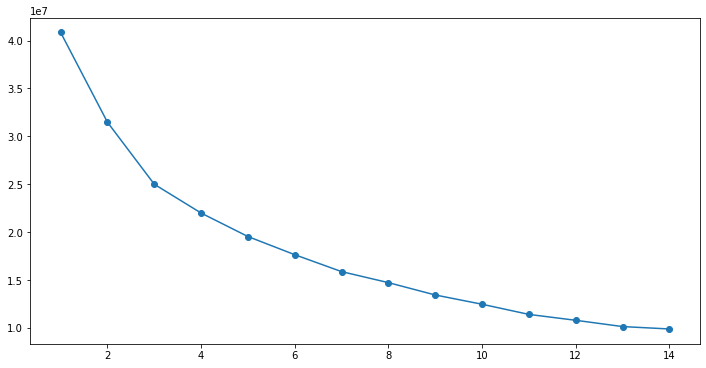

In [51]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Based on the elbow plot, we can assume that minimum 6 clusters are required for the data

In [52]:
concrete_df_scaled = preprocessing.scale(concrete_df)
concrete_df_scaled = pd.DataFrame(concrete_df_scaled, columns=concrete_df.columns) 

kmeans = KMeans(n_clusters= 6)
kmeans.fit(concrete_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[189 135 279  56 173 198]


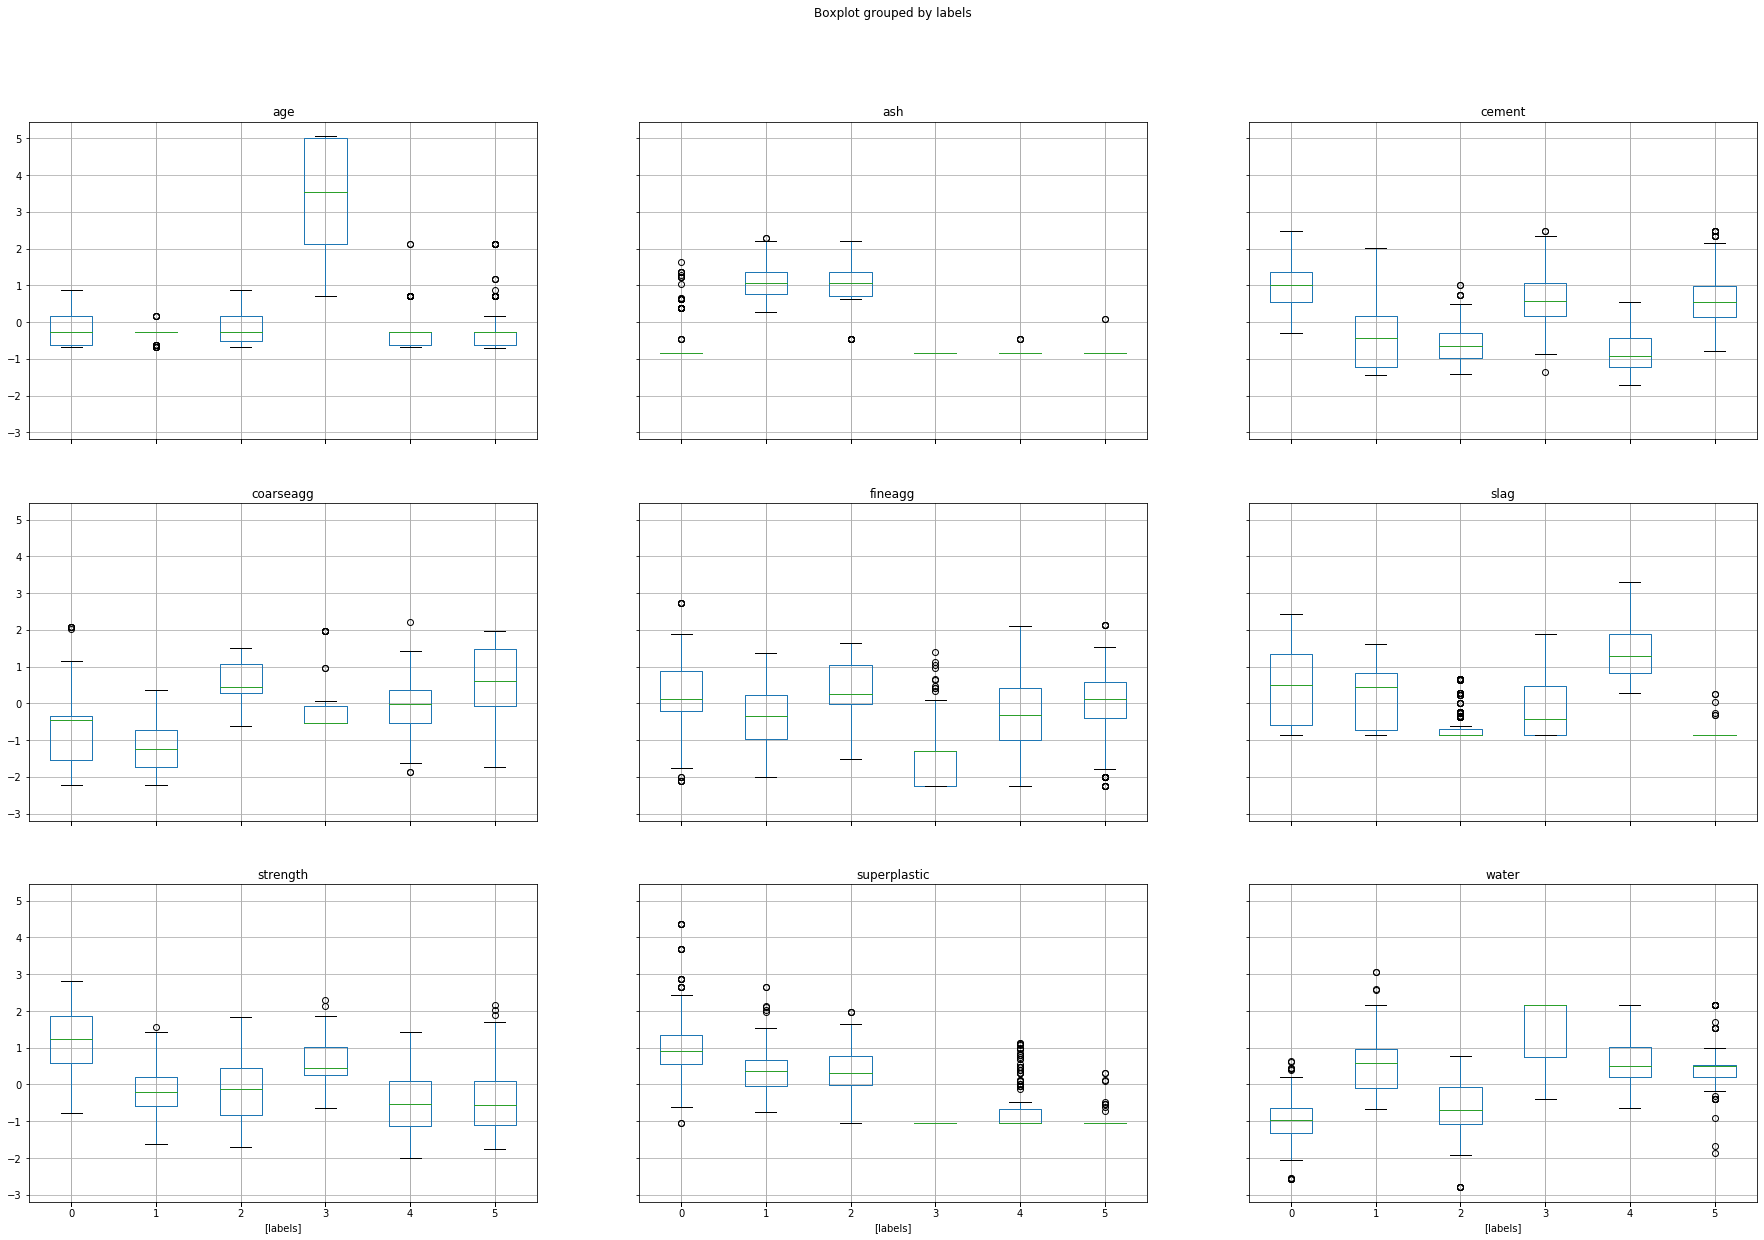

In [54]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
concrete_df_labeled = concrete_df_scaled.join(cluster_labels)

concrete_df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))
plt.show()

from the above box plot for the clusters, it is visible that only for cement we have some grouping that could be done for clustering. rest all data points are having too many outliers

# Trying Ensemble techniques

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Gradient Boosting Regressor

In [56]:

    gbregressor = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=7)
    gbregressor.fit(X_train_scaled , y_train_scaled)
    print (pd.DataFrame(gbregressor.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))
    print("Train scores",gbregressor.score(X_train_scaled, y_train_scaled))
    print("Validation scores",gbregressor.score(X_val_scaled, y_val_scaled))
    print("Test scores",gbregressor.score(X_test_scaled, y_test_scaled))

    prediction = gbregressor.predict(X_test_scaled)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

    Train_scores = gbregressor.score(X_train_scaled, y_train_scaled)
    Validation_scores = gbregressor.score(X_val_scaled, y_val_scaled)
    Test_scores = gbregressor.score(X_test_scaled, y_test_scaled)
    RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
    #Store the score results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting Regressor'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
    resultsDf

                   Imp
cement        0.298319
slag          0.068111
ash           0.009185
water         0.095027
superplastic  0.092264
coarseagg     0.006584
fineagg       0.041291
age           0.389218
Train scores 0.9138855648392458
Validation scores 0.8327652786582224
Test scores 0.8139005181256526
ROOT MEAN SQUARED ERROR : 0.431392491675907


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Gradient Boosting Regressor,91.388556,83.276528,81.390052,0.431392


# Bagging Regressor

In [57]:

    bgregressor = BaggingRegressor(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7)
    bgregressor.fit(X_train_scaled , y_train_scaled)
    #print (pd.DataFrame(bgregressor.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))
    print("Train scores",bgregressor.score(X_train_scaled, y_train_scaled))
    print("Validation scores",bgregressor.score(X_val_scaled, y_val_scaled))
    print("Test scores",bgregressor.score(X_test_scaled, y_test_scaled))
    print("OOB Score",bgregressor.oob_score_)
    prediction = bgregressor.predict(X_test_scaled)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

    Train_scores = bgregressor.score(X_train_scaled, y_train_scaled)
    Validation_scores = bgregressor.score(X_val_scaled, y_val_scaled)
    Test_scores = bgregressor.score(X_test_scaled, y_test_scaled)
    RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
    #Store the score results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
    resultsDf

Train scores 0.9683013828856081
Validation scores 0.855028401710669
Test scores 0.8311483506874097
OOB Score 0.8780529865698925
ROOT MEAN SQUARED ERROR : 0.41091562310599755


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Gradient Boosting Regressor,91.388556,83.276528,81.390052,0.431392


In [58]:

    rfregressor = RandomForestRegressor(n_estimators = 50, max_depth = 5, min_samples_leaf=5,random_state = 7)
    rfregressor.fit(X_train_scaled , y_train_scaled)
    print (pd.DataFrame(rfregressor.feature_importances_, columns = ["Imp"], index = X_train_scaled.columns))
    print("Train scores",rfregressor.score(X_train_scaled, y_train_scaled))
    print("Validation scores",rfregressor.score(X_val_scaled, y_val_scaled))
    print("Test scores",rfregressor.score(X_test_scaled, y_test_scaled))
    prediction = rfregressor.predict(X_test_scaled)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

    Train_scores = rfregressor.score(X_train_scaled, y_train_scaled)
    Validation_scores = rfregressor.score(X_val_scaled, y_val_scaled)
    Test_scores = rfregressor.score(X_test_scaled, y_test_scaled)
    RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
    #Store the score results for each model in a dataframe for final comparison
    tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
    resultsDf

                   Imp
cement        0.310431
slag          0.055766
ash           0.012744
water         0.109291
superplastic  0.091464
coarseagg     0.007937
fineagg       0.018634
age           0.393733
Train scores 0.8680498647325059
Validation scores 0.7936662657843522
Test scores 0.7524932029275816
ROOT MEAN SQUARED ERROR : 0.4975005498212222


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Gradient Boosting Regressor,91.388556,83.276528,81.390052,0.431392


# Lets try resampling techniques for Gradient Boosting regressor and Random Forest regressor

In [59]:
#Please note that this execution may take some time. Please be patient until it completes

concrete_XY = X.join(y)

# configure bootstrap
values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(concrete_df) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50,learning_rate = 0.1, random_state=7)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test_gb = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test_gb)

	stats.append(score)


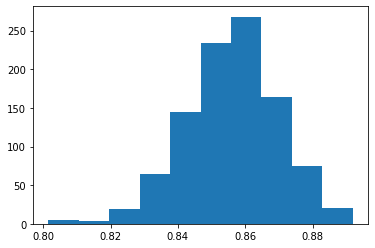

95.0 confidence interval 82.8% and 88.2%


In [60]:
# plot scores to check for the 95% confidence interval
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [61]:
#Please note that this execution may take some time. Please be patient until it completes

# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(concrete_df) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(n_estimators = 50, max_depth = 5, min_samples_leaf=5,random_state = 7)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test_rf = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test_rf)

	stats.append(score)


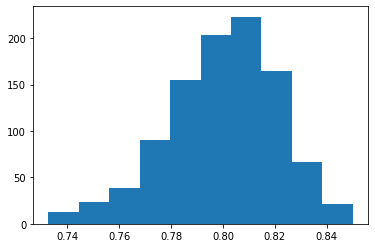

95.0 confidence interval 75.3% and 83.7%


In [62]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# SVM regressor

In [63]:
from sklearn.svm import SVR

In [64]:
svregressor = SVR(kernel = 'rbf',gamma = 'scale',C=1)
svregressor.fit(X_train_scaled , y_train_scaled)

print("Train scores",svregressor.score(X_train_scaled, y_train_scaled))
print("Validation scores",svregressor.score(X_val_scaled, y_val_scaled))
print("Test scores",svregressor.score(X_test_scaled, y_test_scaled))

prediction = svregressor.predict(X_test_scaled)
print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(y_test_scaled,prediction)) )

Train_scores = svregressor.score(X_train_scaled, y_train_scaled)
Validation_scores = svregressor.score(X_val_scaled, y_val_scaled)
Test_scores = svregressor.score(X_test_scaled, y_test_scaled)
RMSE = np.sqrt(mean_squared_error(y_test_scaled,prediction))
#Store the score results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVM Regressor'], 'Train Score': Train_scores*100.0,
                                  'Validation Score': Validation_scores*100.0, 'Test Score': Test_scores*100.0,'RMSE':RMSE })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train Score', 'Validation Score', 'Test Score','RMSE']]
resultsDf

Train scores 0.9064170380494051
Validation scores 0.873673110923914
Test scores 0.8683253428000264
ROOT MEAN SQUARED ERROR : 0.3628700279714122


,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Gradient Boosting Regressor,91.388556,83.276528,81.390052,0.431392


Out of all the validations, SVM regressor gives us the best results with higher R2 values for validation and test and lower Root mean square value. We will try to do some grid / random CV search for SVM regressor to see which hyper parameter will be the best fit for our model

# Grid Search

In [65]:
#The execution may take some time due to the grid parameters. Please be patient

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
    
#pipe_svr = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svr', SVR())]) 
pipe_svr = Pipeline([('scl', StandardScaler()),('svr', SVR())]) 


#param_grid = {'pca__n_components':[4,5],'svr__C': [0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.01, 0.1, 1, 10], 'svr__kernel':['rbf','poly']} 
param_grid = {'svr__C': [1, 10], 'svr__gamma': [0.01, 0.1,1], 'svr__kernel':['rbf','poly']} 


grid = GridSearchCV( pipe_svr , param_grid = param_grid, cv = 5) 
grid.fit(X_train, y_train) 

print(" Best cross-validation score: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Validation set score: {:.2f}". format( grid.score( X_val, y_val)))
print(" Test set score: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation score: 0.82
 Best parameters:  {'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}
 Validation set score: 0.87
 Test set score: 0.86


# Random Search CV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#The execution may take some time due to the grid parameters. Please be patient
# run randomized search
samples = 5  # number of random samples 
#pipe_svr = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svr', SVR())]) 
pipe_svr = Pipeline([('scl', StandardScaler()),('svr', SVR())]) 


#param_grid = {'pca__n_components':[4,5],'svr__C': [0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.01, 0.1, 1, 10], 'svr__kernel':['rbf','poly']} 
#param_grid = {'svr__C': [0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.01, 0.1, 1, 10], 'svr__kernel':['rbf','poly']} 
param_grid = {'svr__C': [0.01,1], 'svr__gamma': [0.1,1], 'svr__kernel':['rbf','poly']} 


randomCV = RandomizedSearchCV(pipe_svr, param_grid, n_iter=samples) #default cv = 3

#randomCV = RandomizedSearchCV( pipe_svr , param_grid = param_grid, n_iter=samples) 
randomCV.fit(X_train, y_train) 

print(" Best cross-validation score: {:.2f}". format( randomCV.best_score_)) 
print(" Best parameters: ", randomCV.best_params_) 
print(" Validation set score: {:.2f}". format( randomCV.score( X_val, y_val)))
print(" Test set score: {:.2f}". format( randomCV.score( X_test, y_test)))

 Best cross-validation score: 0.61
 Best parameters:  {'svr__kernel': 'poly', 'svr__gamma': 1, 'svr__C': 0.01}
 Validation set score: 0.71
 Test set score: 0.73


In [69]:
resultsDf

,Method,Train Score,Validation Score,Test Score,RMSE
0,Simple Linear Regression,71.217399,76.452000,77.077231,7.690504
0,Simple Linear Regression Scaled,71.217399,77.010391,77.030785,0.479262
0,Ridge,71.217203,77.007274,77.016948,0.479406
0,Lasso,63.229365,67.623136,66.774663,0.576414
0,Linear Regression for poly features,80.727635,77.301594,74.101661,0.489556
0,Ridge fit on Poly feature,80.711471,77.544924,74.453841,0.486216
0,Lasso fit on poly features,51.308803,53.869460,55.021876,0.645160
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Decision Tree,63.549865,55.510361,54.258399,0.676325
0,Gradient Boosting Regressor,91.388556,83.276528,81.390052,0.431392


# Summary

Based on the above observations from Random & Grid searches, it is to be found that Grid search has produced better results for SVM regressor with the Best parameters:  {'svr__C': 10, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}. Overall SVM Regressor is the best algorithm which can be fine tuned further to have a better model for this data